##**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pickle
import json

## **1. Data Understanding**

### **Data Loading**

In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/ilyasbrhm/Dataset/refs/heads/main/tmdb_dataset.csv"

# Membaca dataset sebagai dataframe
dataset_movies = pd.read_csv(url)

###**Data Exploration**

In [ ]:
# Menampilkan 5 data teratas
dataset_movies.head()

,title,release_year,rating,popularity,genres,poster_url
0,Cinderella,1950,7.043,13.1439,"['Family', 'Fantasy', 'Animation', 'Romance']",https://image.tmdb.org/t/p/w500/4nssBcQUBadCTB...
1,Sunset Boulevard,1950,8.295,5.4441,['Drama'],https://image.tmdb.org/t/p/w500/sC4Dpmn87oz9Au...
2,Rashomon,1950,8.071,5.6019,"['Crime', 'Drama', 'Mystery']",https://image.tmdb.org/t/p/w500/vL7Xw04nFMHwnv...
3,Broken Arrow,1950,6.700,3.9647,"['Western', 'Romance']",https://image.tmdb.org/t/p/w500/n061xgOTAvJ2l0...
4,All About Eve,1950,8.080,4.3758,['Drama'],https://image.tmdb.org/t/p/w500/qU5QzNDrsusmuq...


In [ ]:
# Melihat jumlah baris dan kolom
print("Jumlah Baris dan Kolom")
print(dataset_movies.shape)

Jumlah Baris dan Kolom
(15000, 6)


In [ ]:
# Melihat jenis data
print("Jenis Data:")
print(dataset_movies.dtypes)

Jenis Data:
title            object
release_year      int64
rating          float64
popularity      float64
genres           object
poster_url       object
dtype: object


In [ ]:
# Tambahkan kolom movie_id dari 1 sampai jumlah data
dataset_movies['movie_id'] = range(1, len(dataset_movies) + 1)

# Pindahkan movie_id ke kolom paling kiri
cols = ['movie_id'] + [col for col in dataset_movies.columns if col != 'movie_id']
dataset_movies = dataset_movies[cols]

In [ ]:
dataset_movies.dtypes

,0
movie_id,int64
title,object
release_year,int64
rating,float64
popularity,float64
genres,object
poster_url,object


### **Data Cleaning**

In [ ]:
# Memeriksa missing values
print("Data yang Hilang")
print(dataset_movies.isnull().sum())

Data yang Hilang
movie_id         0
title            0
release_year     0
rating           0
popularity       0
genres           0
poster_url      47
dtype: int64


In [ ]:
# Membersihkan missing values
df_cleaned = dataset_movies.dropna(subset=['poster_url'])
print(df_cleaned.isnull().sum())

movie_id        0
title           0
release_year    0
rating          0
popularity      0
genres          0
poster_url      0
dtype: int64


In [ ]:
# Membersihkan data duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Cek jumlah data setelah hapus duplikat
print(f"Jumlah data setelah hapus duplikat: {df_cleaned.shape[0]}")

Jumlah data setelah hapus duplikat: 14953


In [ ]:
# Mengubah isi kolom genres dari string berbentuk list ke list Python asli
df_cleaned['genre_clean'] = df_cleaned['genres'].apply(lambda x: eval(x) if isinstance(x, str) else [])

# Pecah semua genre jadi satu list besar
all_genres = [genre.strip() for sublist in df_cleaned['genre_clean'] for genre in sublist]

# Hitung jumlah kemunculan tiap genre
genre_count = Counter(all_genres)

# Konversi ke DataFrame dan urutkan
genre_df = pd.DataFrame(genre_count.items(), columns=['Genre', 'Jumlah']).sort_values(by='Jumlah', ascending=False)

In [ ]:
# Dataframe hasil hitungan Counter yang menunjukkan jumlah film dari setiap genre
genre_df

,Genre,Jumlah
4,Drama,6562
11,Comedy,4702
14,Action,3173
12,Thriller,3011
3,Romance,2444
9,Adventure,2335
5,Crime,2311
18,Horror,1823
16,Science Fiction,1637
1,Fantasy,1405


In [ ]:
# Menampilkandf_cleaned_cleaned (dataframe yang sudah dibersihkan)
df_cleaned

,movie_id,title,release_year,rating,popularity,genres,poster_url,genre_clean
0,1,Cinderella,1950,7.043,13.1439,"['Family', 'Fantasy', 'Animation', 'Romance']",https://image.tmdb.org/t/p/w500/4nssBcQUBadCTB...,"[Family, Fantasy, Animation, Romance]"
1,2,Sunset Boulevard,1950,8.295,5.4441,['Drama'],https://image.tmdb.org/t/p/w500/sC4Dpmn87oz9Au...,[Drama]
2,3,Rashomon,1950,8.071,5.6019,"['Crime', 'Drama', 'Mystery']",https://image.tmdb.org/t/p/w500/vL7Xw04nFMHwnv...,"[Crime, Drama, Mystery]"
3,4,Broken Arrow,1950,6.700,3.9647,"['Western', 'Romance']",https://image.tmdb.org/t/p/w500/n061xgOTAvJ2l0...,"[Western, Romance]"
4,5,All About Eve,1950,8.080,4.3758,['Drama'],https://image.tmdb.org/t/p/w500/qU5QzNDrsusmuq...,[Drama]
...,...,...,...,...,...,...,...,...
14995,14996,Never Let Go,2024,6.141,10.6241,['Horror'],https://image.tmdb.org/t/p/w500/iwUoM3y77fov7b...,[Horror]
14996,14997,Number 24,2024,7.100,10.6290,"['War', 'History', 'Drama']",https://image.tmdb.org/t/p/w500/rzsmKSFEsEWBLb...,"[War, History, Drama]"
14997,14998,Fly Me to the Moon,2024,6.837,10.7169,"['Romance', 'Comedy']",https://image.tmdb.org/t/p/w500/gjk8YdXpItoC1i...,"[Romance, Comedy]"
14998,14999,Arthur the King,2024,7.609,9.8087,"['Adventure', 'Drama']",https://image.tmdb.org/t/p/w500/zkKB3kOun5DKAk...,"[Adventure, Drama]"


In [ ]:
df_cleaned = df_cleaned.reset_index(drop=True)

### **Data Visualization**

**Jumlah Film Berdasarkan Distribusi Rating Film**

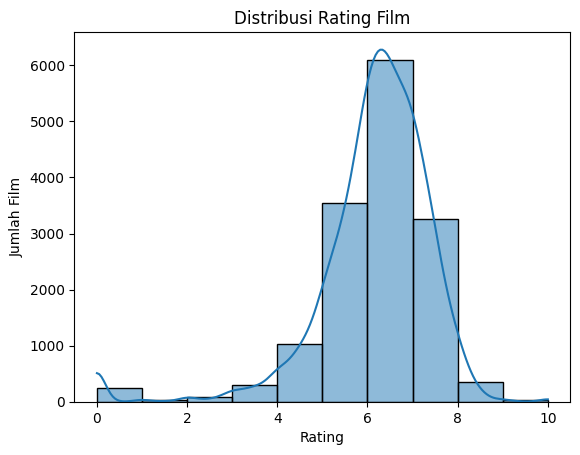

In [ ]:
# Visualisasi jumlah film per rating (0-10)
sns.histplot(df_cleaned['rating'], bins=10, kde=True)
plt.title('Distribusi Rating Film')
plt.xlabel('Rating')
plt.ylabel('Jumlah Film')
plt.show()

**Jumlah Film Berdasarkan Tahun Rilis**

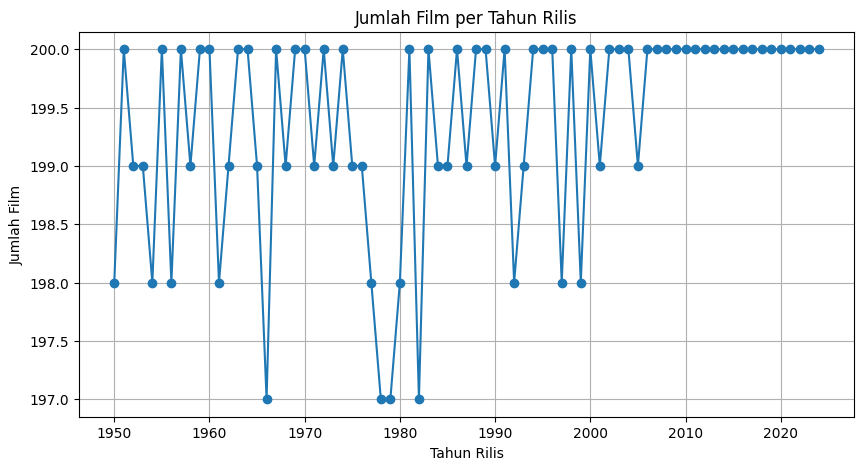

In [ ]:
# Visualisasi Jumlah film per tahun rilis
film_per_tahun = df_cleaned['release_year'].value_counts().sort_index()
film_per_tahun.plot(kind='line', figsize=(10,5), marker='o')
plt.title('Jumlah Film per Tahun Rilis')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Film')
plt.grid()
plt.show()

**10 Genre dengan Jumlah Film Terbanyak**

<ipython-input-17-5992d5737651>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df.head(10), y='Genre', x='Jumlah', palette='viridis')


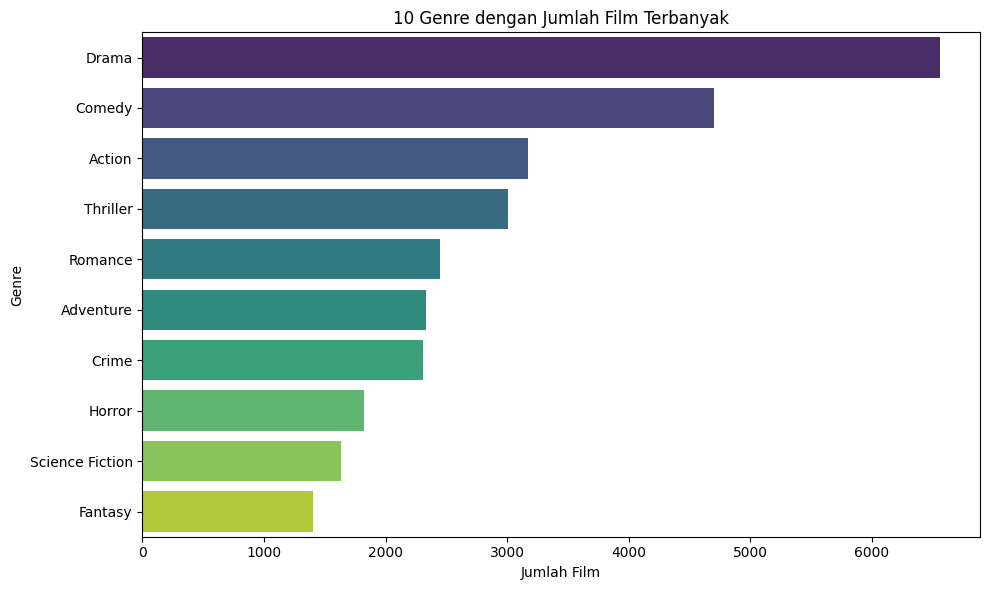

In [ ]:
# Visualisasi 10 genre dengan jumlah film terbanyak
plt.figure(figsize=(10,6))
sns.barplot(data=genre_df.head(10), y='Genre', x='Jumlah', palette='viridis')
plt.title('10 Genre dengan Jumlah Film Terbanyak')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

**Rating vs Popularity Scatter Plot**

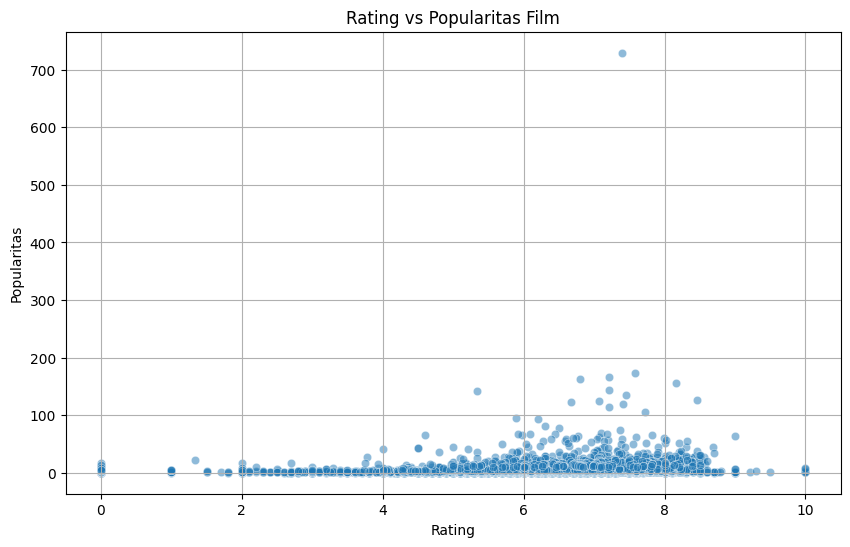

In [ ]:
# Melihat pola hubungan antara skor popularitas dan rating film
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cleaned, x='rating', y='popularity', alpha=0.5)
plt.title('Rating vs Popularitas Film')
plt.xlabel('Rating')
plt.ylabel('Popularitas')
plt.grid(True)
plt.show()

## **2. Data Preparation**

### **Mapping**

In [ ]:
# Mapping mood berdasarkan genre
def genre_to_mood(genres_str):
    if 'Science Fiction' in genres_str or 'Fantasy' in genres_str:
        return 'Imaginative'
    elif 'Romance' in genres_str:
        return 'Romantic'
    elif 'Documentary' in genres_str:
        return 'Insightful'
    elif 'Action' in genres_str or 'Adventure' in genres_str:
        return 'Energetic'
    elif 'Drama' in genres_str or 'Family' in genres_str:
        return 'Emotional'
    elif 'Horror' in genres_str or 'Thriller' in genres_str or 'Mystery' in genres_str:
        return 'Thrilling'
    elif 'Comedy' in genres_str or 'Animation' in genres_str:
        return 'Cheerful'
    elif 'Science Fiction' in genres_str or 'Fantasy' in genres_str:
        return 'Imaginative'

    else:
        return 'Neutral'

df_cleaned['mood'] = df_cleaned['genre_clean'].apply(genre_to_mood)

In [ ]:
df_cleaned

,movie_id,title,release_year,rating,popularity,genres,poster_url,genre_clean,mood
0,1,Cinderella,1950,7.043,13.1439,"['Family', 'Fantasy', 'Animation', 'Romance']",https://image.tmdb.org/t/p/w500/4nssBcQUBadCTB...,"[Family, Fantasy, Animation, Romance]",Imaginative
1,2,Sunset Boulevard,1950,8.295,5.4441,['Drama'],https://image.tmdb.org/t/p/w500/sC4Dpmn87oz9Au...,[Drama],Emotional
2,3,Rashomon,1950,8.071,5.6019,"['Crime', 'Drama', 'Mystery']",https://image.tmdb.org/t/p/w500/vL7Xw04nFMHwnv...,"[Crime, Drama, Mystery]",Emotional
3,4,Broken Arrow,1950,6.700,3.9647,"['Western', 'Romance']",https://image.tmdb.org/t/p/w500/n061xgOTAvJ2l0...,"[Western, Romance]",Romantic
4,5,All About Eve,1950,8.080,4.3758,['Drama'],https://image.tmdb.org/t/p/w500/qU5QzNDrsusmuq...,[Drama],Emotional
...,...,...,...,...,...,...,...,...,...
14948,14996,Never Let Go,2024,6.141,10.6241,['Horror'],https://image.tmdb.org/t/p/w500/iwUoM3y77fov7b...,[Horror],Thrilling
14949,14997,Number 24,2024,7.100,10.6290,"['War', 'History', 'Drama']",https://image.tmdb.org/t/p/w500/rzsmKSFEsEWBLb...,"[War, History, Drama]",Emotional
14950,14998,Fly Me to the Moon,2024,6.837,10.7169,"['Romance', 'Comedy']",https://image.tmdb.org/t/p/w500/gjk8YdXpItoC1i...,"[Romance, Comedy]",Romantic
14951,14999,Arthur the King,2024,7.609,9.8087,"['Adventure', 'Drama']",https://image.tmdb.org/t/p/w500/zkKB3kOun5DKAk...,"[Adventure, Drama]",Energetic


In [ ]:
# Hitung jumlah film per mood
mood_counts = df_cleaned['mood'].value_counts()

# Tampilkan hasil
print(mood_counts)

mood
Emotional      3986
Imaginative    2821
Energetic      2657
Romantic       2186
Thrilling      1318
Cheerful       1181
Neutral         562
Insightful      242
Name: count, dtype: int64


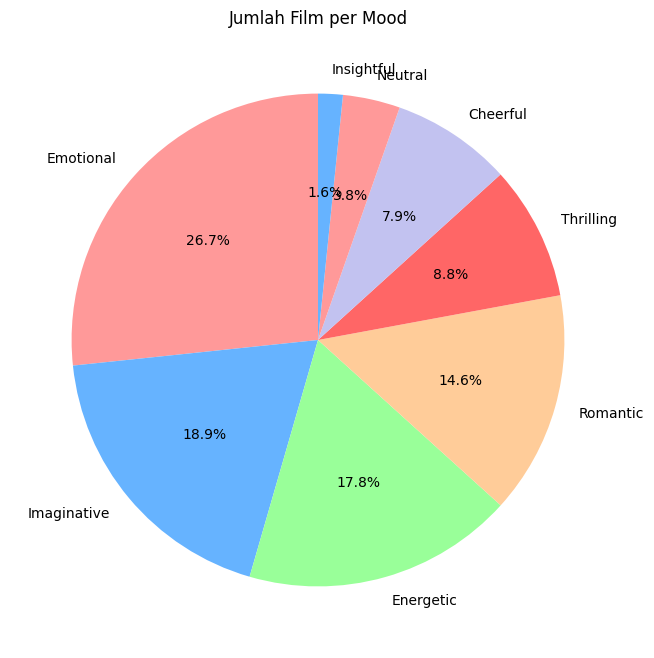

In [ ]:
# Visualisasi jumlah film berdasarkan mood
plt.figure(figsize=(8, 8))
mood_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ff6666', '#c2c2f0'])
plt.title('Jumlah Film per Mood')
plt.ylabel('')
plt.show()

### **Multilabel Binarization**

In [ ]:
mlb = MultiLabelBinarizer()
genre_ohe = mlb.fit_transform(df_cleaned['genre_clean'])
genre_df = pd.DataFrame(genre_ohe, columns=mlb.classes_)

### **Feature Engineering**

In [ ]:
features = pd.concat([
    df_cleaned[['release_year', 'popularity', 'rating']].reset_index(drop=True),
    genre_df.reset_index(drop=True)
], axis=1)

### **Standardization**

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### **Label Encoding**

In [ ]:
le = LabelEncoder()
labels = le.fit_transform(df_cleaned['mood'])

### **One-Hot Encoding for Labels**

In [ ]:
labels_ohe = tf.keras.utils.to_categorical(labels)

### **Data Splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, labels_ohe, test_size=0.2, random_state=42)

## **3. Modelling**

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,720 (45.78 KB)

 Trainable params: 11,720 (45.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7308 - loss: 0.9231 - val_accuracy: 0.9979 - val_loss: 0.0270
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9928 - loss: 0.0417 - val_accuracy: 0.9992 - val_loss: 0.0069
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9981 - loss: 0.0153 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9986 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9990 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 8.2507e-04
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9982 - loss: 0.0091 - val_accuracy: 1.0000 - val_loss: 6.2843e-04
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 2.3713e-04
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9996 - loss: 0.0029 - val

## **4. Evaluation**

### **Test Accuracy Score**

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy score (test): {test_accuracy * 100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9973 - loss: 0.0203
Accuracy score (test): 99.90%


### **Classification Report**

In [ ]:
# Prediksi
y_pred = model.predict(X_test)

# Konversi dari one-hot encoding ke label asli
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Label kelas (nama mood dari LabelEncoder)
class_names = le.classes_

# Tampilkan classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

    Cheerful       1.00      1.00      1.00       244
   Emotional       1.00      1.00      1.00       756
   Energetic       0.99      1.00      1.00       526
 Imaginative       1.00      1.00      1.00       562
  Insightful       1.00      1.00      1.00        40
     Neutral       1.00      1.00      1.00       134
    Romantic       1.00      1.00      1.00       441
   Thrilling       1.00      1.00      1.00       288

    accuracy                           1.00      2991
   macro avg       1.00      1.00      1.00      2991
weighted avg       1.00      1.00      1.00      2991



### **Plot Accuracy dan Loss**

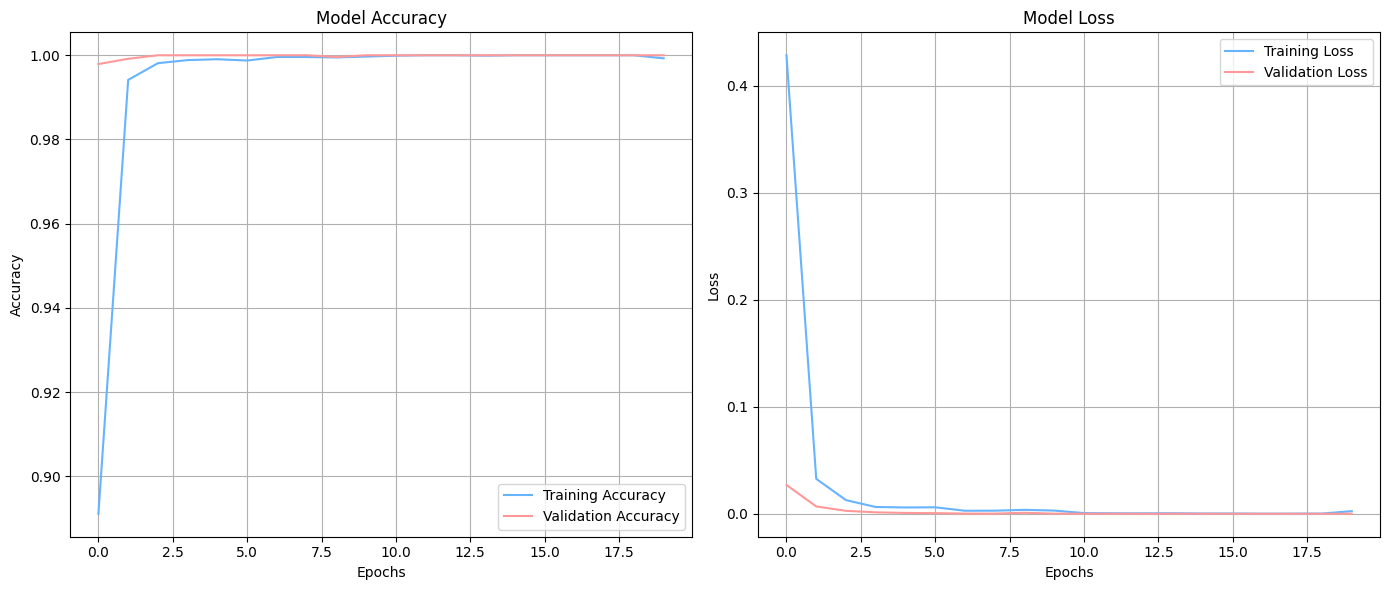

In [ ]:
# Plot Akurasi dan Loss Training Model Mood Classification
plt.figure(figsize=(14, 6))

# Plot Akurasi Training dan Validation
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='#66b3ff')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#ff9999')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss Training dan Validation
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='#66b3ff')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#ff9999')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### **Confusion Matrix**

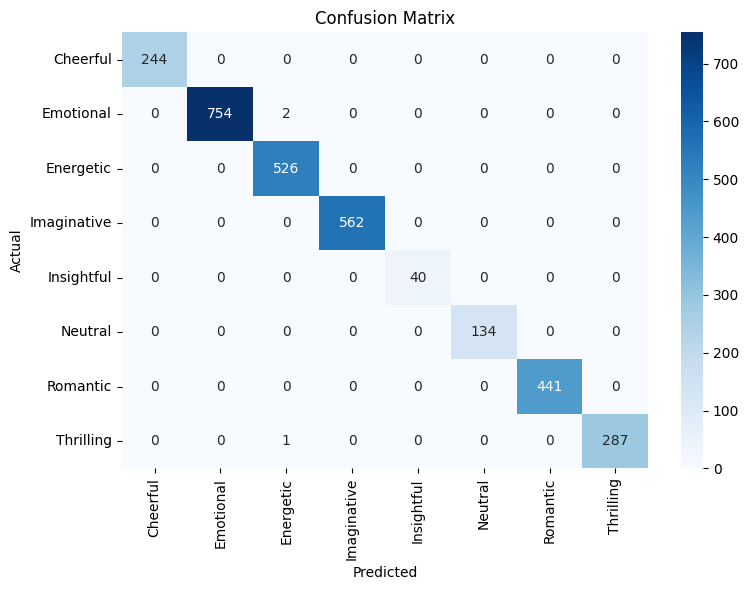

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Visualisasi
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### **Model Saving**

In [ ]:
model.save("sistem_rekomendasi_model.h5")

import pickle
with open("scaler.pkl", "wb") as f: pickle.dump(scaler, f)
with open("mlb.pkl", "wb") as f: pickle.dump(mlb, f)
with open("label_encoder.pkl", "wb") as f: pickle.dump(le, f)

In [ ]:
df_cleaned.to_csv('dataset_fix.csv', index=False)

In [ ]:
!pip freeze > requirements.txt